In [1]:
# STANDARD LIBRARIES
import pandas as pd
import numpy as np
import pickle

# VISUALS
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Read Files

In [3]:
main = pd.read_csv("../data/clean-data/main-engineered.csv")
main.drop(columns=["Unnamed: 0"], inplace=True)

In [7]:
vis_df = main.drop(columns=[
    "label_zip",
    "label_street",
#     "zipcode",
    "zip_street",
    "zip_num_street"
])

In [10]:
# LISTS TO PERFORM EDA ON
data_cols = pd.read_pickle("../assets/variables/data_cols")
pw_cols = pd.read_pickle("../assets/variables/pw_cols")
fire_cols = pd.read_pickle("../assets/variables/fire_cols")
requests_cols = pd.read_pickle("../assets/variables/requests_cols")

all_cols = [data_cols,
            pw_cols,
            fire_cols,
            requests_cols]

# data_cols.remove("zipcode")
# pw_cols.remove("zipcode")
# fire_cols.remove("zipcode")
# requests_cols.remove("zipcode")

for col in main.columns:
    for lst in all_cols:
        if "label" in col:
            lst.append(col)

In [11]:
# DATA COLS
filename = "../assets/variables/data_cols"
outfile = open(filename, "wb")
pickle.dump(data_cols, outfile)
outfile.close()

# PW COLS
filename = "../assets/variables/pw_cols"
outfile = open(filename, "wb")
pickle.dump(pw_cols, outfile)
outfile.close()

# FIRE COLS
filename = "../assets/variables/fire_cols"
outfile = open(filename, "wb")
pickle.dump(fire_cols, outfile)
outfile.close()

# REQUESTS COLS
filename = "../assets/variables/requests_cols"
outfile = open(filename, "wb")
pickle.dump(requests_cols, outfile)
outfile.close()

# Outliers

In [12]:
vis_df.describe()

,zipcode,lu_category,land_value,bldg_value,total_value,gross_tax_amount,total_a_prop,total_ah_prop,total_c_prop,total_cc_prop,...,req_source_category_2_total_street,req_source_category_3_total_street,req_source_category_4_total_street,req_source_category_5_total_street,req_source_category_0_total_zip,req_source_category_1_total_zip,req_source_category_2_total_zip,req_source_category_3_total_zip,req_source_category_4_total_zip,req_source_category_5_total_zip
count,97515.000000,97515.000000,9.751500e+04,9.751500e+04,9.751500e+04,9.751500e+04,97515.000000,97515.000000,97515.000000,97515.000000,...,97515.000000,97515.000000,97515.000000,97515.000000,97515.000000,97515.000000,97515.000000,97515.000000,97515.000000,97515.000000
mean,2128.597703,9.300179,1.380212e+06,3.128014e+06,4.508226e+06,2.715092e+06,0.029780,0.000031,0.045019,0.018479,...,0.004122,0.000297,0.000492,0.000010,21.056545,2.642270,13.968559,1.139548,1.576506,0.008983
std,20.415539,3.349893,9.466022e+07,1.319626e+08,2.009776e+08,3.814047e+07,0.236876,0.005547,0.467874,0.832820,...,0.125927,0.022867,0.025614,0.003202,389.975287,48.088501,254.082293,20.151024,29.286031,0.171501
min,2108.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2124.000000,7.000000,9.940000e+04,2.765000e+05,4.097000e+05,4.171730e+05,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2127.000000,10.000000,1.450000e+05,4.109000e+05,5.763000e+05,5.973020e+05,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2132.000000,11.000000,2.033000e+05,7.436000e+05,9.884000e+05,1.019007e+06,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2467.000000,15.000000,2.638983e+10,2.956638e+10,3.783646e+10,5.131498e+09,19.000000,1.000000,127.000000,200.000000,...,12.000000,4.000000,3.000000,1.000000,8635.000000,967.000000,4907.000000,580.000000,705.000000,4.000000


In [ ]:
# A TRADITIONAL OUTLIER IS < 1.5X THE IQR THAN Q1, > 1.5X THE UQR THAN Q3 

q1 = vis_df.quantile(0.25)
q3 = vis_df.quantile(0.75)
iqr = q3 - q1

outliers_df = (vis_df < (q1 - 1.5 * iqr)) |(vis_df> (q3 + 1.5 * iqr))
# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

outliers_df = outliers_df.loc[outliers_df["total_value"] == True].astype(int)

In [46]:
outlier_by_col = {}
outlier_count = []


for col in outliers_df:
    outlier_by_col[col] = outliers_df[col].sum()
    
outlier_by_col
# LOTS OF OUTLIERS?

{'zipcode': 3160,
 'lu_category': 2431,
 'land_value': 11671,
 'bldg_value': 11995,
 'total_value': 12058,
 'gross_tax_amount': 11795,
 'total_a_prop': 2537,
 'total_ah_prop': 3,
 'total_c_prop': 3958,
 'total_cc_prop': 770,
 'total_cd_prop': 12995,
 'total_cl_prop': 1377,
 'total_cm_prop': 9400,
 'total_e_prop': 5220,
 'total_ea_prop': 351,
 'total_i_prop': 383,
 'total_r1_prop': 17,
 'total_r2_prop': 17196,
 'total_r3_prop': 13781,
 'total_r4_prop': 2499,
 'total_rc_prop': 2773,
 'total_rl_prop': 3762,
 'owner_occ_prop': 9446,
 'total_a_street': 11237,
 'total_ah_street': 16,
 'total_c_street': 15381,
 'total_cc_street': 17772,
 'total_cd_street': 10933,
 'total_cl_street': 14401,
 'total_cm_street': 8949,
 'total_e_street': 9677,
 'total_ea_street': 6952,
 'total_i_street': 13549,
 'total_r1_street': 7346,
 'total_r2_street': 7492,
 'total_r3_street': 10461,
 'total_r4_street': 11648,
 'total_rc_street': 14098,
 'total_rl_street': 5587,
 'owner_occ_street': 9446,
 'total_a_zipcode':

# Correlation

In [202]:
main[requests_cols].describe()

,requests_total,requests_open_status_total,reason_category_0_total,reason_category_1_total,reason_category_2_total,reason_category_3_total,reason_category_4_total,reason_category_5_total,reason_category_6_total,reason_category_7_total,...,reason_category_36_total,reason_category_37_total,reason_category_38_total,reason_category_39_total,source_category_0_total,source_category_1_total,source_category_2_total,source_category_3_total,source_category_4_total,source_category_5_total
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,5857.176471,725.500000,32.323529,38.500000,1.235294,88.117647,0.147059,1.529412,228.470588,11.735294,...,5.147059,242.941176,0.117647,2.411765,2411.352941,536.176471,2380.705882,255.852941,272.558824,0.529412
std,4695.512974,558.657224,36.830258,31.098329,1.759112,78.869960,0.359491,1.926455,202.889616,9.671291,...,5.034020,237.330219,0.409338,2.463278,2255.778477,464.292454,2095.226270,219.687951,252.493527,0.928841
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1389.250000,240.250000,7.000000,11.250000,0.000000,24.000000,0.000000,0.000000,75.000000,4.250000,...,1.000000,11.750000,0.000000,0.000000,802.250000,97.750000,429.500000,52.250000,29.250000,0.000000
50%,5608.500000,741.500000,19.500000,38.000000,0.000000,63.500000,0.000000,1.000000,203.000000,9.000000,...,3.500000,197.500000,0.000000,2.000000,1858.000000,489.000000,1761.000000,256.000000,225.500000,0.000000
75%,8575.750000,1125.000000,46.750000,61.750000,2.000000,159.000000,0.000000,2.750000,340.000000,15.000000,...,8.000000,376.250000,0.000000,4.000000,2923.750000,888.000000,4255.000000,381.750000,387.750000,1.000000
max,15029.000000,1884.000000,144.000000,105.000000,6.000000,287.000000,1.000000,6.000000,816.000000,33.000000,...,21.000000,858.000000,2.000000,9.000000,8635.000000,1756.000000,8169.000000,812.000000,837.000000,4.000000


In [47]:
corr_main = main.corr()
corr_data = main[data_cols].corr()
corr_pw = main[pw_cols].corr()
corr_fire = main[fire_cols].corr()
corr_requests = main[requests_cols].corr()

KeyError: "['st_name', 'num_street'] not in index"

**Correlation of Main**

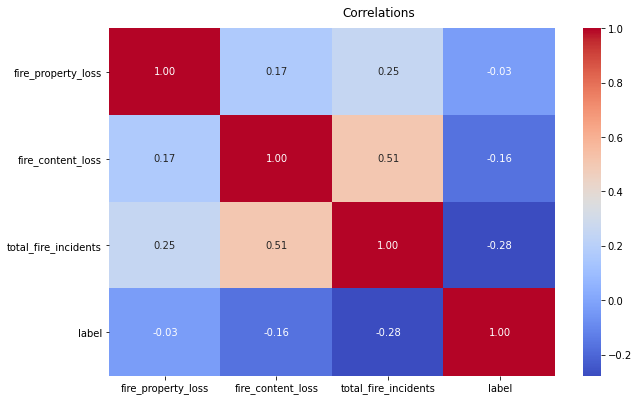

In [218]:
f, ax = plt.subplots(figsize=(10, 6))
heatmap = sns.heatmap(corr_fire,
                      ax=ax,
                      cmap="coolwarm",
                      fmt=".2f",
                      annot=True)
f.subplots_adjust(top=0.93)
t = f.suptitle("Correlations")
# https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

**Correlation on Zipcode As Labels**

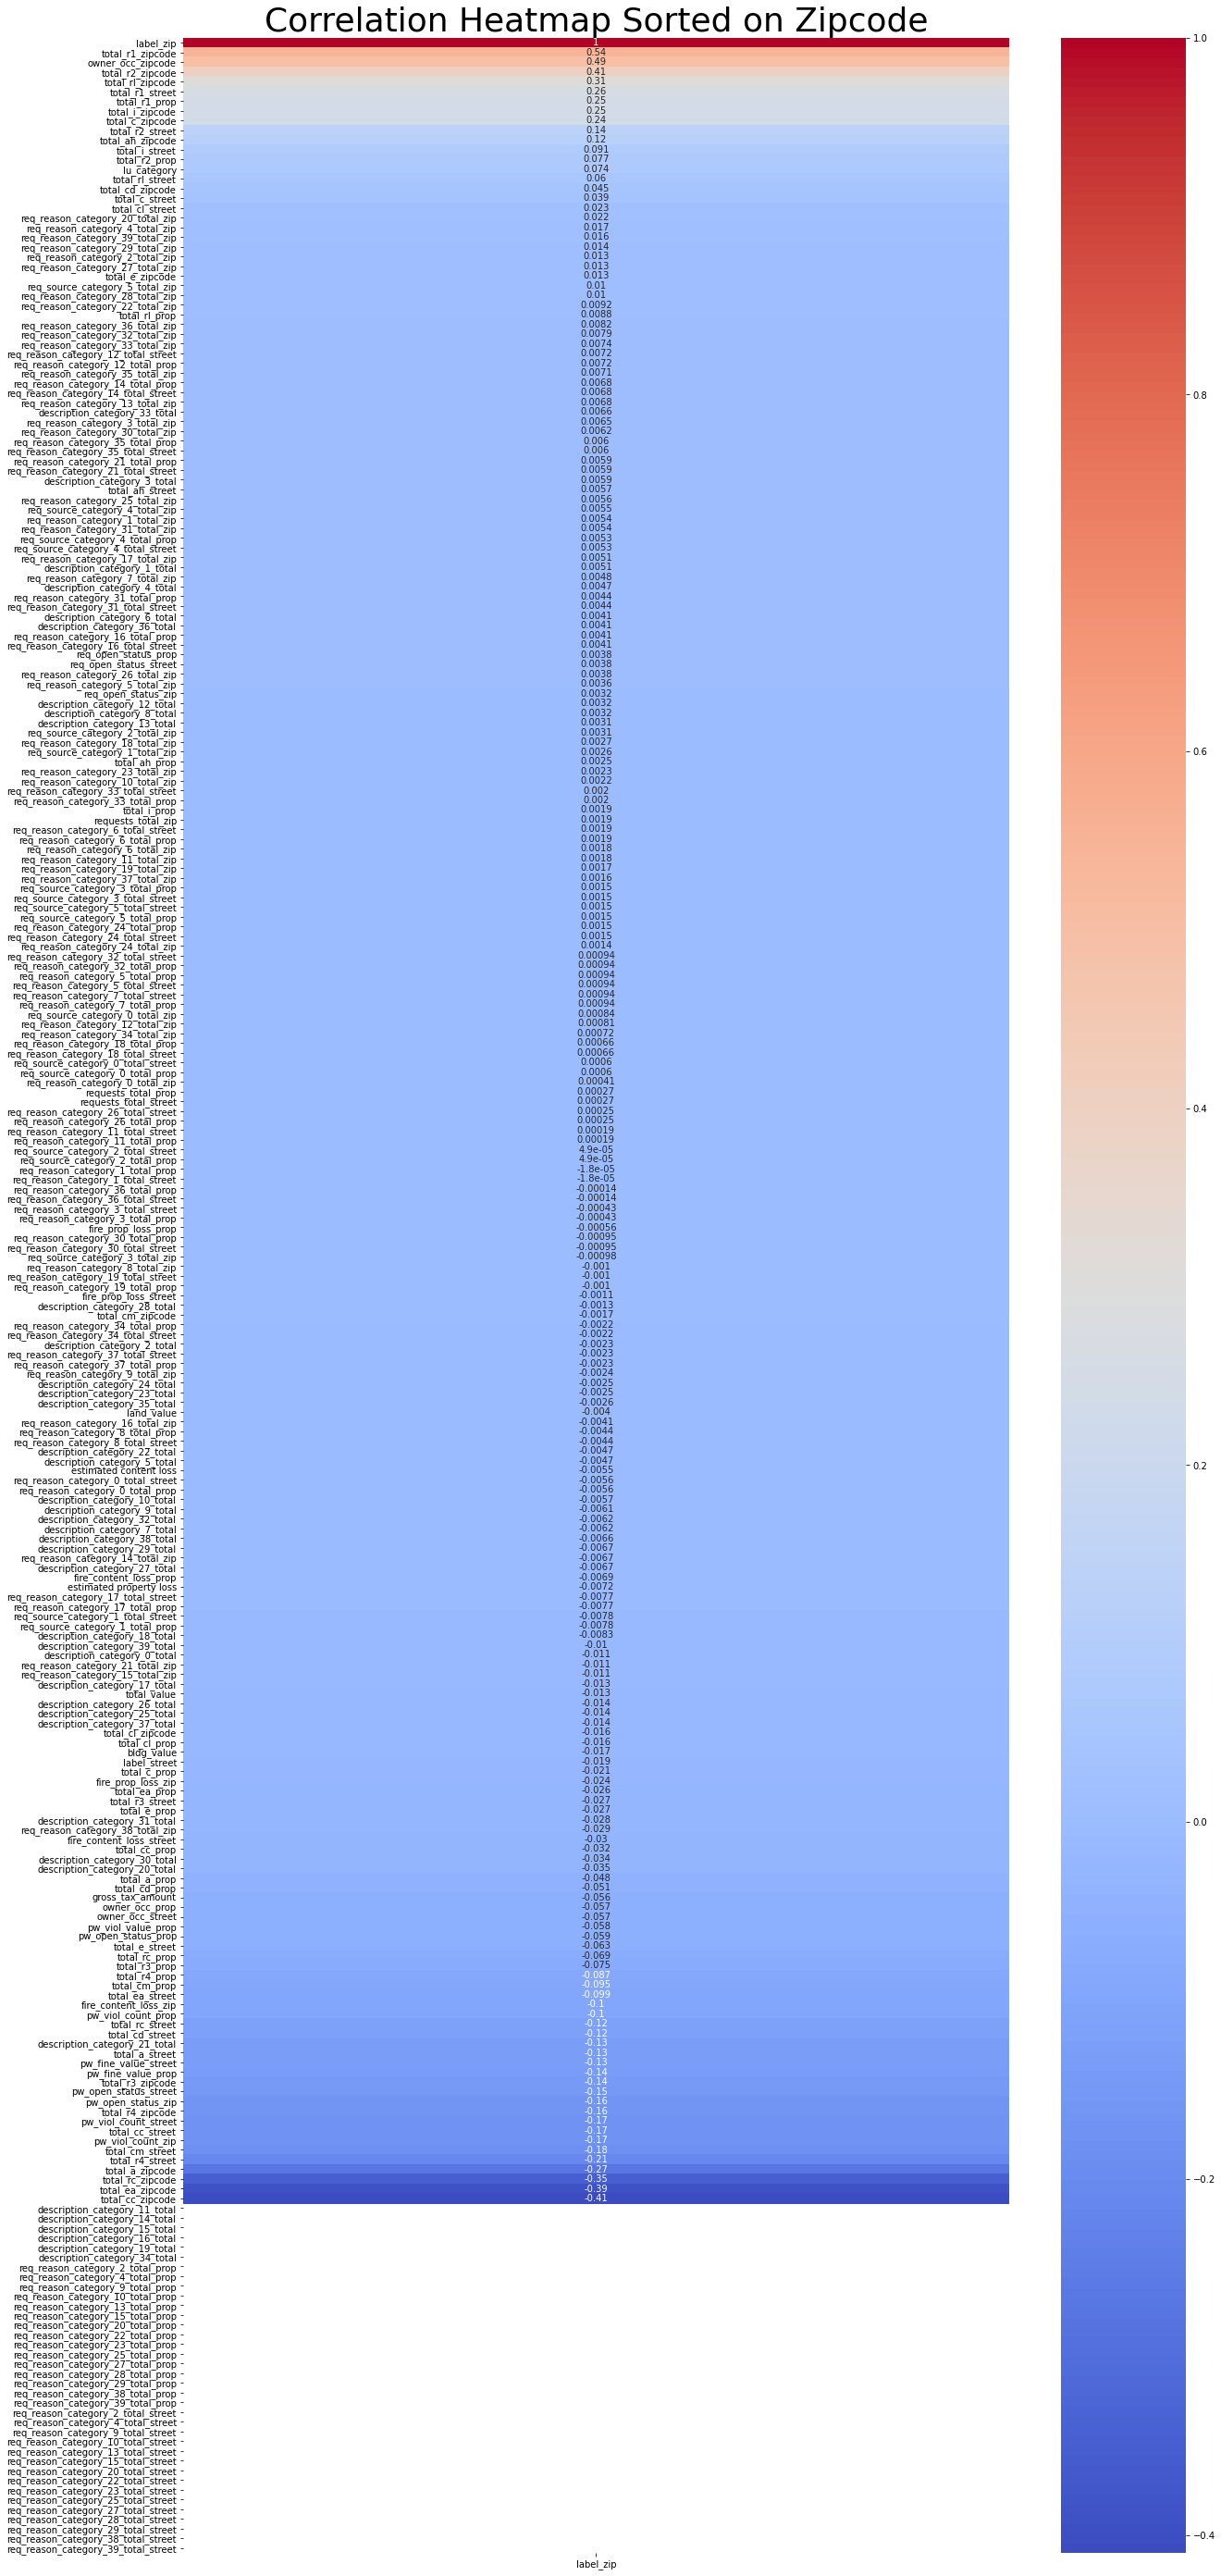

In [49]:
plt.figure(figsize=(20, 50))

plt.title("Correlation Heatmap Sorted on Zipcode", fontsize=36)
sns.heatmap(corr_main.drop("zipcode")[
           ["label_zip"]].sort_values(by=["label_zip"], ascending=False),
           cmap="coolwarm",
           annot=True);

# Histograms

**For organization of the outputs from the `.hist()` method, the histograms will be grouped together based on  the dataset they oirginated from.**

In [206]:
# for col_list in all_cols:
#     print(col_list)
#     main[col_list].hist()
#     print()

In [207]:
# DATA
main[data_cols].hist(
    figsize=(20, 40),
    layout=(7, 3)
);

Error in callback <function flush_figures at 0x7f204cc0d4d0> (for post_execute):


KeyboardInterrupt: 

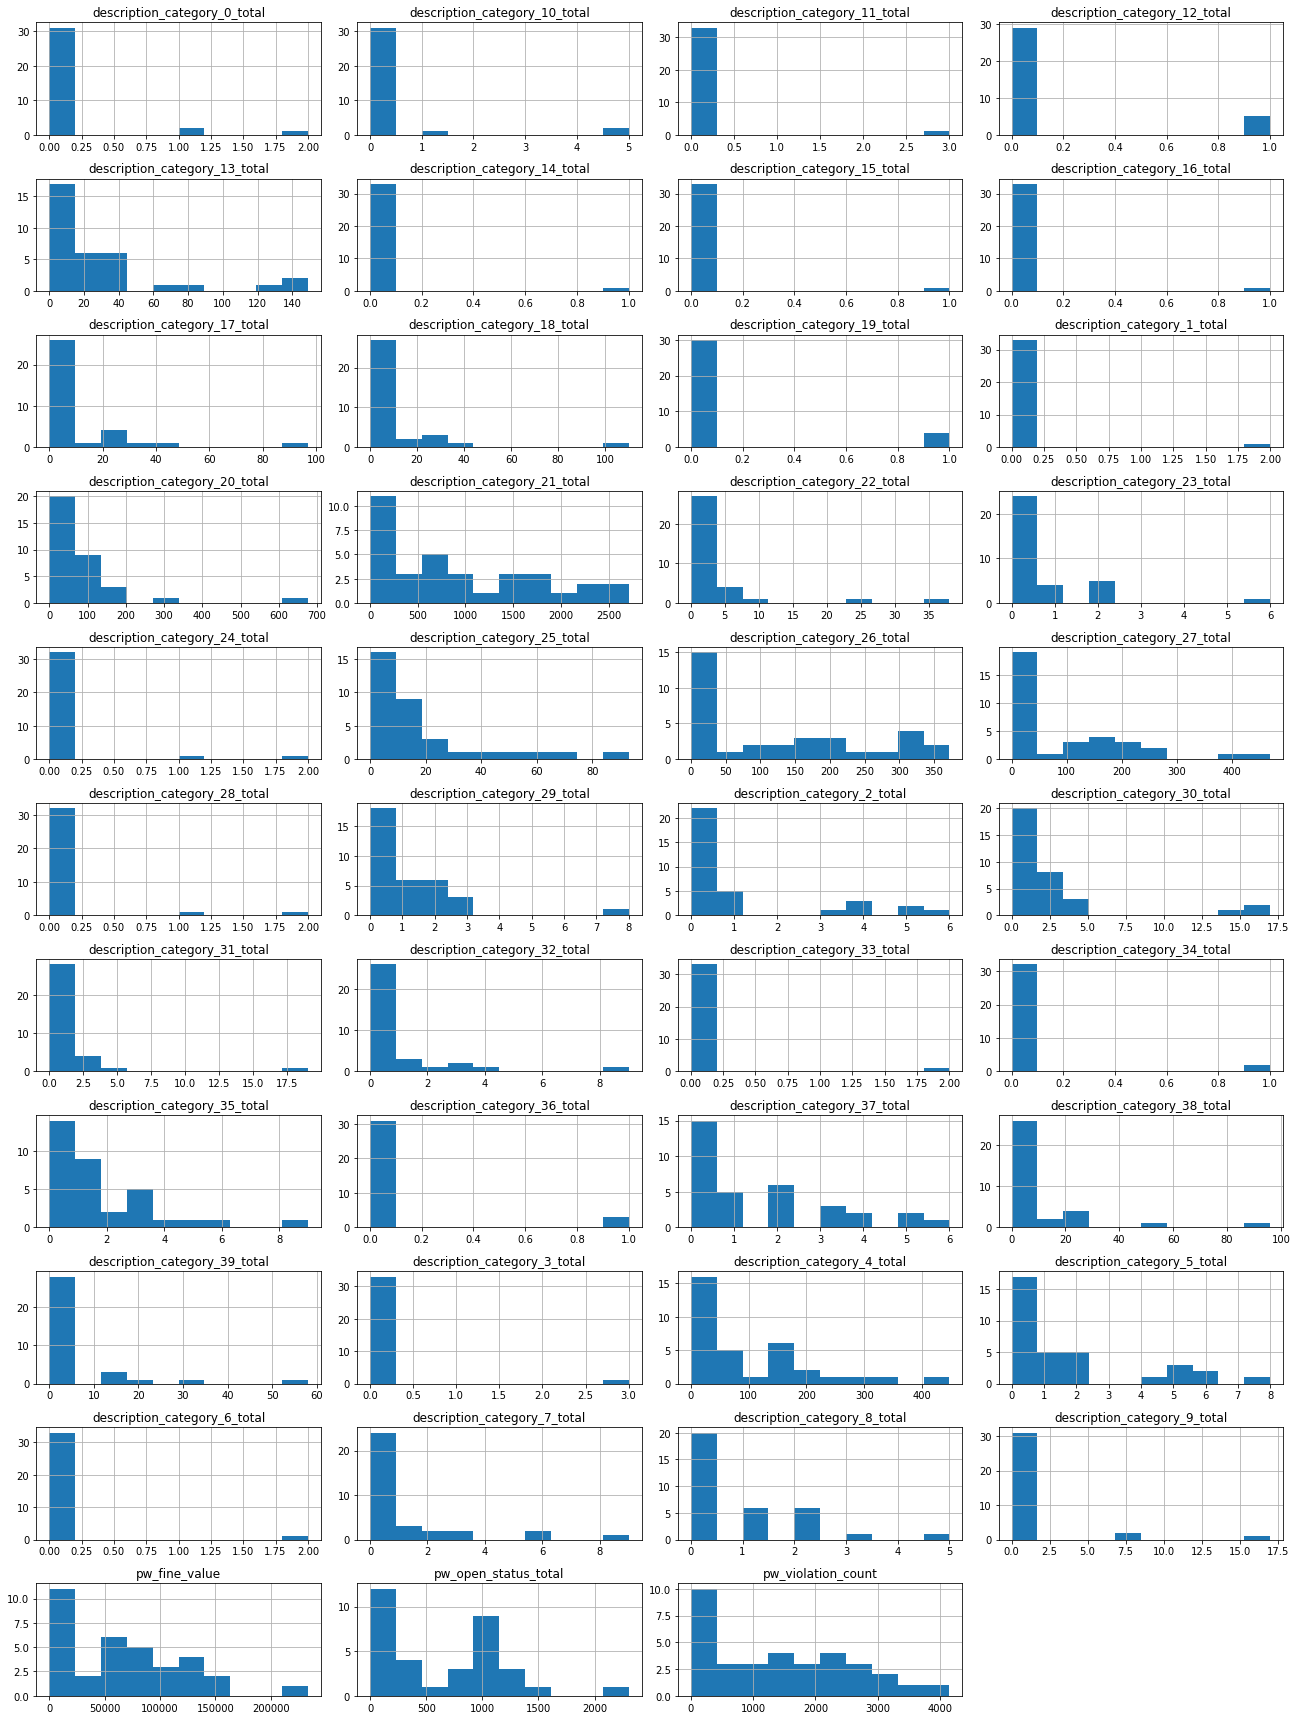

In [208]:
# PW VIOLATIONS
main[pw_cols].hist(
    figsize=(18, 24),
    layout=(11, 4)
)
plt.tight_layout();

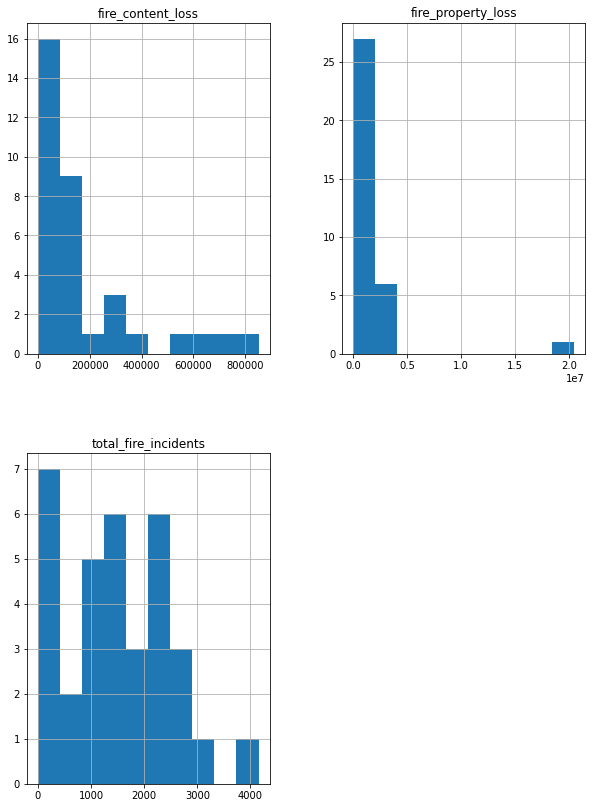

In [209]:
# FIRE 
main[fire_cols].hist(
    figsize=(10, 14)
);

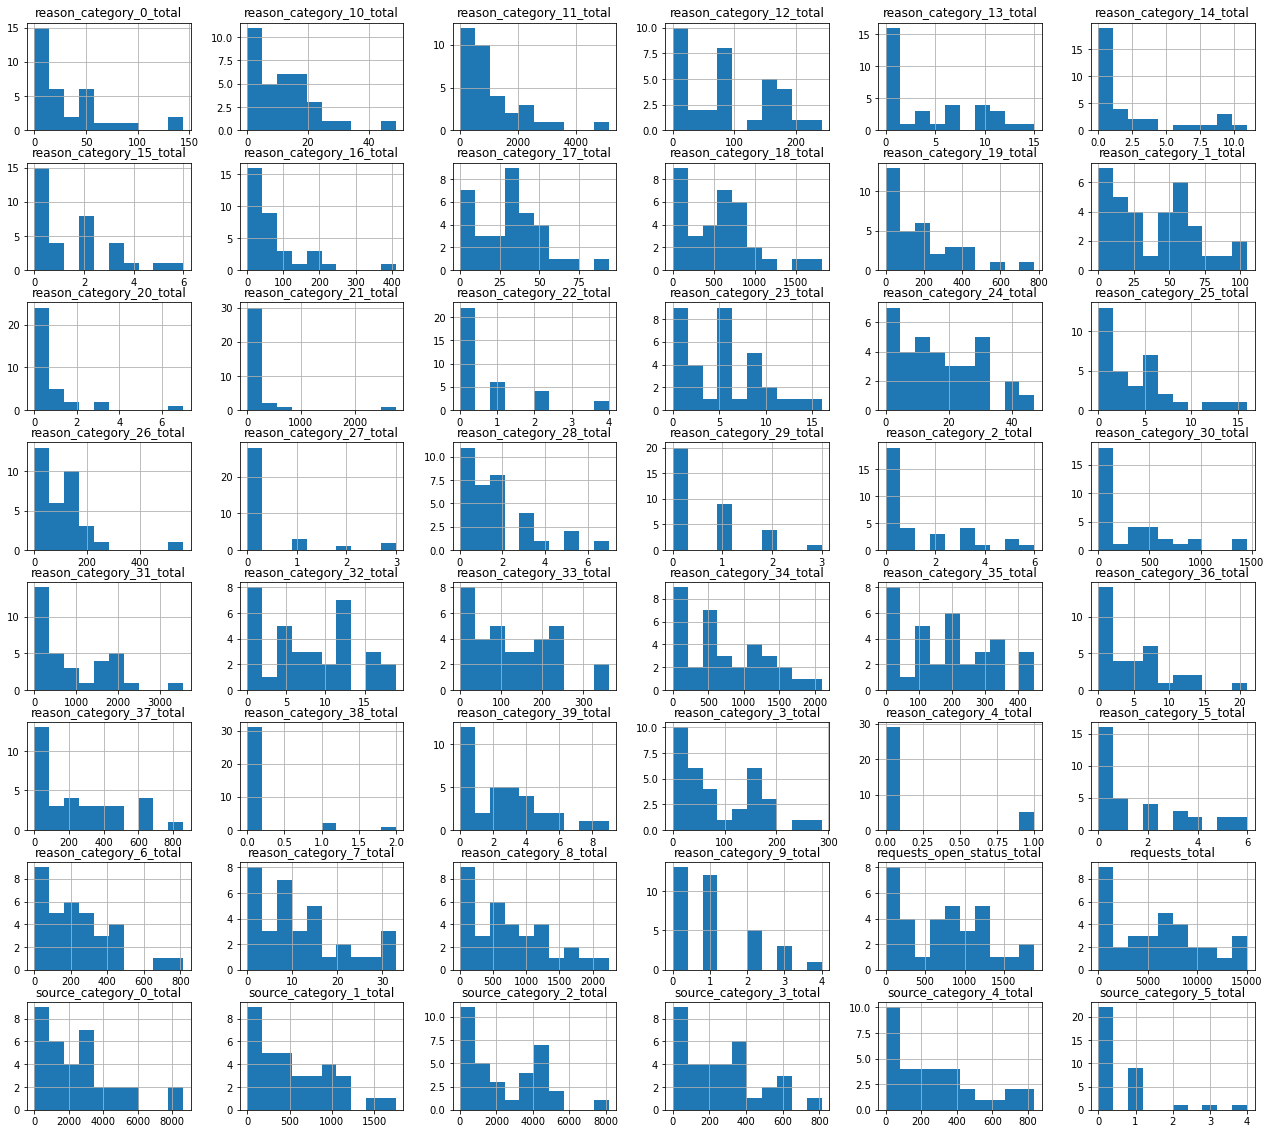

In [210]:
# REQUESTS
main[requests_cols].hist(
    figsize=(22, 20),
    layout=(8, 6)
);

# Boxplots

# Plots

## Data Plots

/home/patrick/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<Figure size 1440x7200 with 0 Axes>

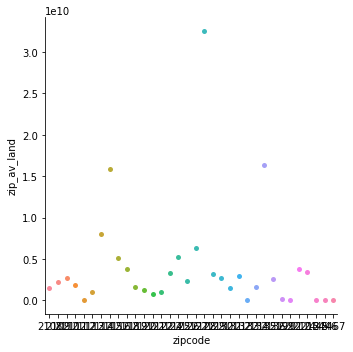

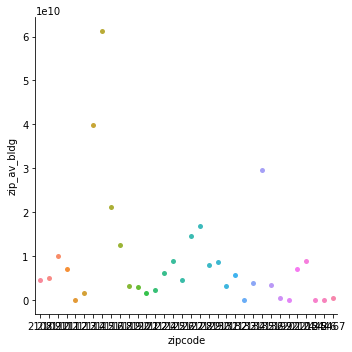

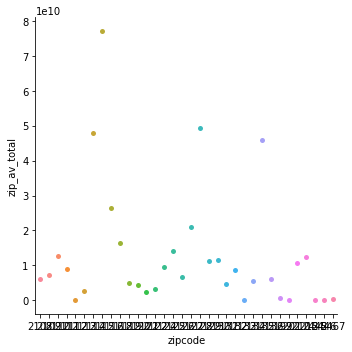

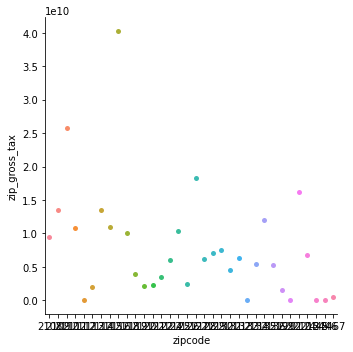

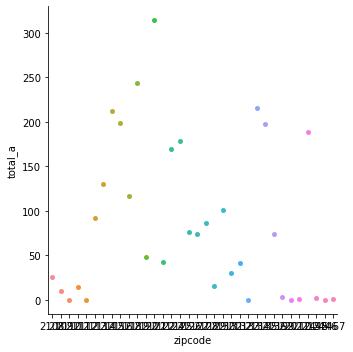

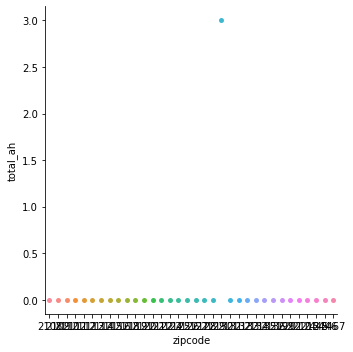

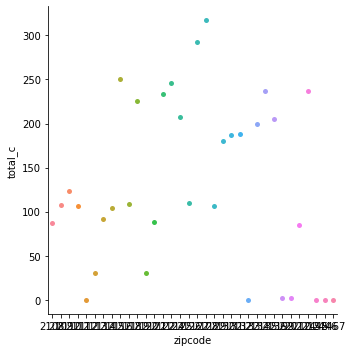

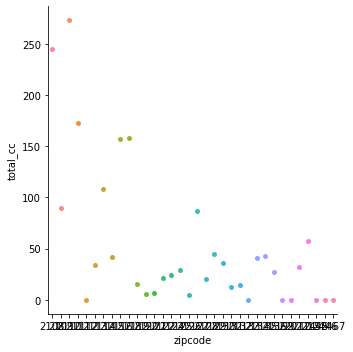

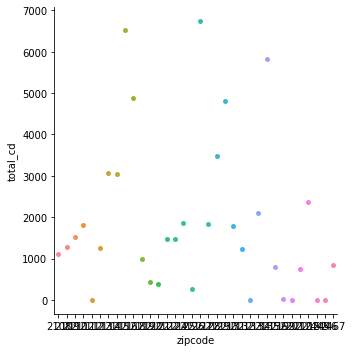

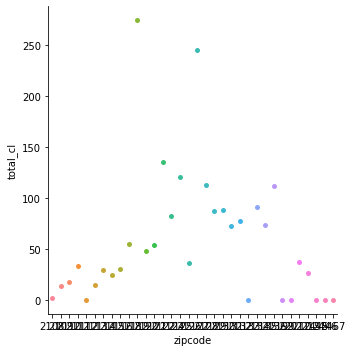

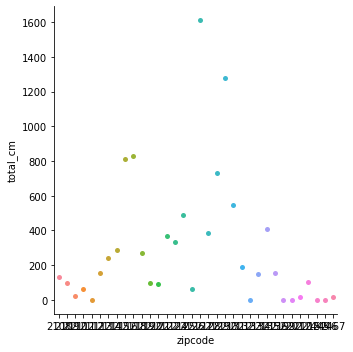

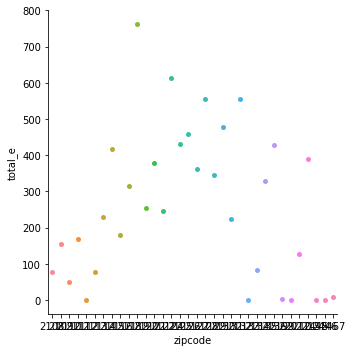

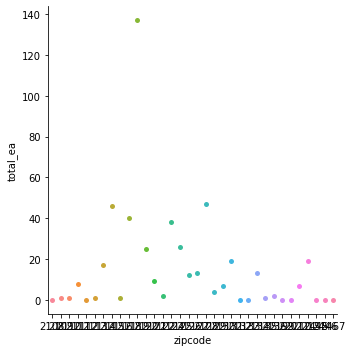

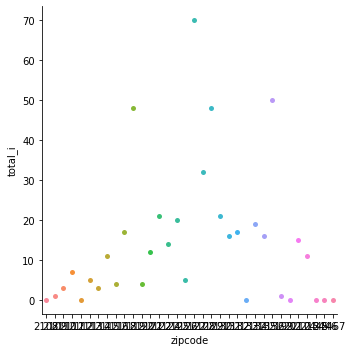

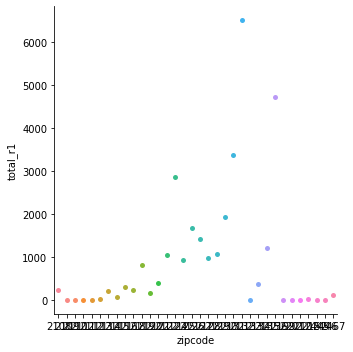

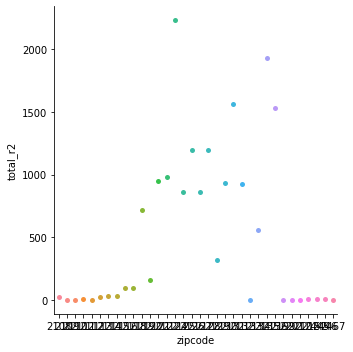

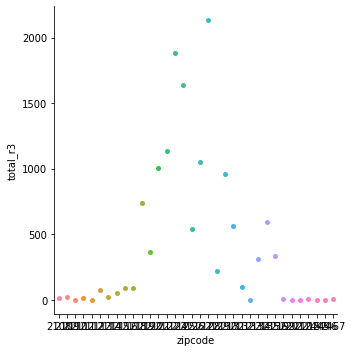

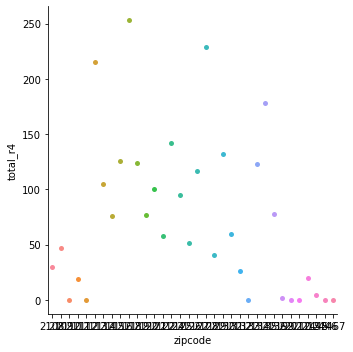

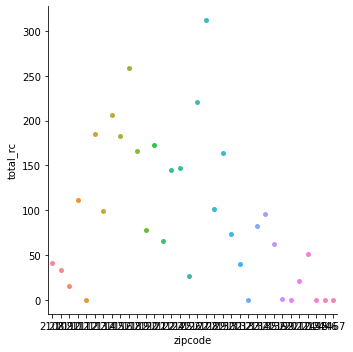

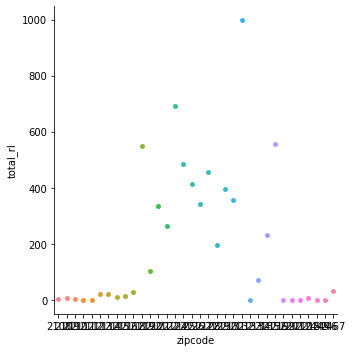

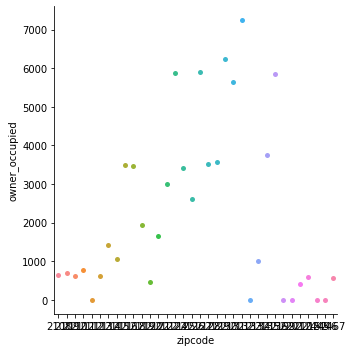

In [211]:
plt.figure(figsize=(20, 100))
for col in data_cols:
    sns.catplot(x="zipcode",
                y=col,
                kind="swarm",
                data=main)

## Fire Plots

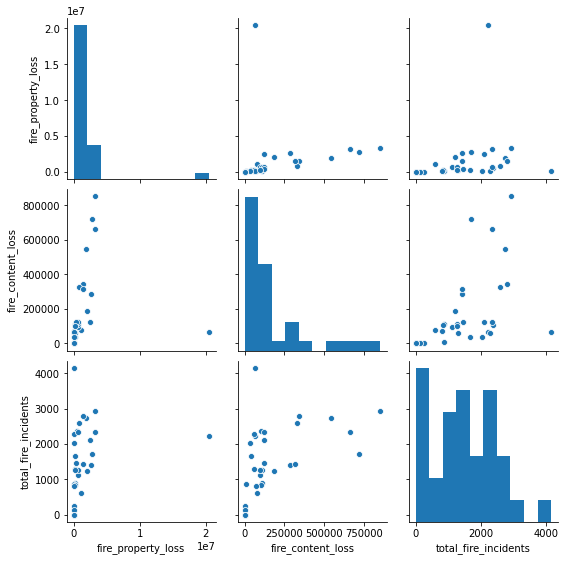

In [212]:
# ON FIRE COLUMNS

sns.pairplot(main[fire_cols]);

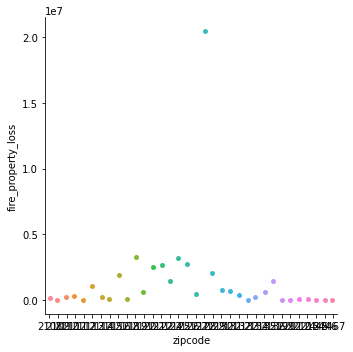

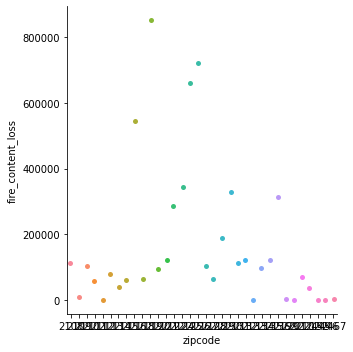

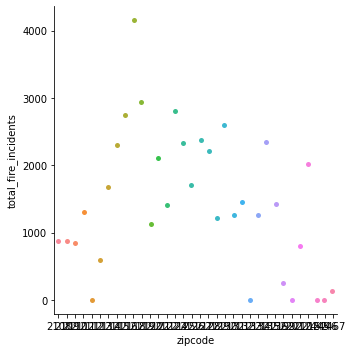

In [213]:
for col in fire_cols:
    sns.catplot(x="zipcode",
                y=col,
                data=main)